In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Multi_Label_dataset/train.csv")

In [3]:
df = df.drop("Genre",axis=1)

In [4]:
df.shape

(7254, 26)

In [5]:
df

,Id,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import numpy as np
from PIL import Image
import os

# Get the list of image filenames and corresponding one-hot encoded labels
filenames = df['Id'].values
filenames

array(['tt0086425', 'tt0085549', 'tt0086465', ..., 'tt2442502',
       'tt3455850', 'tt4179482'], dtype=object)

In [12]:
filenames.shape

(7254,)

In [13]:
labels = df.drop('Id', axis=1).values
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [10]:
labels.shape

(7254, 25)

In [11]:
# Create empty arrays to hold the image data and labels
X = np.zeros((len(filenames), 224, 224, 3))
y = np.zeros((len(filenames), 25))

In [12]:
# Loop over the images and load them into the X array
for i, filename in enumerate(filenames):
    img = Image.open(os.path.join('Multi_Label_dataset/Images/'+filename+'.jpg')).convert('RGB')
    img = img.resize((224, 224))
    img_arr = np.array(img) / 255.0  # normalize the pixel values
    X[i] = img_arr

In [13]:
X.shape

(7254, 224, 224, 3)

In [14]:
# Set the y array to the one-hot encoded labels
y = labels

In [15]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define the CNN model for multi-label classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    
    #as output will be 32*(222*222) because padding is set to default.
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(25, activation='sigmoid')  # use sigmoid for multi-label classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # use binary cross-entropy for multi-label classification
              metrics=['accuracy'])

In [16]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=32
)

# Print training accuracy for each epoch
for i, acc in enumerate(history.history['accuracy']):
    print(f"Epoch {i+1} - Training Accuracy: {acc:.4f}")
    
# Save the trained model
model.save('my_model.h5')


Epoch 1/10
182/182 [==============================] - 1244s 7s/step - loss: 0.2480 - accuracy: 0.2788 - val_loss: 0.2396 - val_accuracy: 0.3549
Epoch 2/10
182/182 [==============================] - 1184s 7s/step - loss: 0.2345 - accuracy: 0.3214 - val_loss: 0.2343 - val_accuracy: 0.3604
Epoch 3/10
182/182 [==============================] - 1759s 10s/step - loss: 0.2296 - accuracy: 0.3298 - val_loss: 0.2328 - val_accuracy: 0.3563
Epoch 4/10
182/182 [==============================] - 1943s 11s/step - loss: 0.2249 - accuracy: 0.3491 - val_loss: 0.2364 - val_accuracy: 0.3804
Epoch 5/10
182/182 [==============================] - 1141s 6s/step - loss: 0.2175 - accuracy: 0.3614 - val_loss: 0.2343 - val_accuracy: 0.3591
Epoch 6/10
182/182 [==============================] - 1027s 6s/step - loss: 0.2040 - accuracy: 0.3833 - val_loss: 0.2446 - val_accuracy: 0.3336
Epoch 7/10
182/182 [==============================] - 1095s 6s/step - loss: 0.1776 - accuracy: 0.4205 - val_loss: 0.2614 - val_accurac

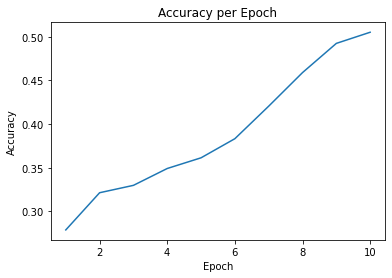

In [17]:
import matplotlib.pyplot as plt

# Plotting the accuracy values using Matplotlib
plt.plot(range(1, 11),history.history['accuracy'])
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


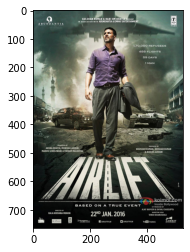

In [17]:
import matplotlib.pyplot as plt
img = Image.open('airlift-movie-poster-4.jpg')

# Display the image
plt.imshow(img)
plt.show()

In [18]:
img = Image.open(os.path.join('airlift-movie-poster-4.jpg')).convert('RGB')
img = img.resize((224, 224))
img_arr = np.array(img) / 255.0  # normalize the pixel values
img_arr = np.expand_dims(img_arr, axis=0)

In [19]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')

# Make predictions on new data
predictions = model.predict(img_arr)

# Print the predictions
print(predictions)


1/1 [==============================] - 3s 3s/step
[[9.6748674e-01 9.9923110e-01 6.4030856e-02 5.8624705e-09 9.4090315e-04
  2.1242720e-08 5.4752301e-02 3.5676276e-04 6.2734082e-02 4.1008596e-07
  5.2862271e-04 1.0250797e-05 2.7508472e-04 1.0839667e-08 7.7709211e-07
  2.1855625e-05 2.5883887e-06 6.3662175e-15 6.2559258e-07 3.3921858e-03
  3.9012940e-09 3.3648728e-08 3.0393854e-02 8.9343519e-07 1.7127811e-06]]


In [20]:
threshold = 0.5
predicted_labels = []
for i, p in enumerate(predictions[0]):
    if p >= threshold:
        predicted_labels.append(i)

# Print the predicted labels
print(predicted_labels)
for i in predicted_labels:
    print(df.drop('Id', axis=1).columns[i])

[0, 1]
Action
Adventure


In [26]:
from sklearn.metrics import f1_score, hamming_loss

# Get the model's predictions and ground truth labels for the test set
y_pred = model.predict(X_val)
y_true = y_val
import numpy as np

# Set a threshold value to convert continuous targets to binary labels
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Compute Hamming loss on binary labels
hamming_loss_value = hamming_loss(y_true, y_pred_binary)
print("Hamming loss:", hamming_loss_value)

46/46 [==============================] - 129s 3s/step
Hamming loss: 0.10836664369400413


In [28]:
hamming = 1 - hamming_loss_value

print("Hamming score:", hamming)

Hamming score: 0.8916333563059958


In [41]:

# average='macro' calculates the F1 score for each label independently and takes the average
f1_score_value = f1_score(y_true, y_pred_binary, average='micro')

print("Macro-averaged F1 score:", f1_score_value)


Macro-averaged F1 score: 0.3272291631011467


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


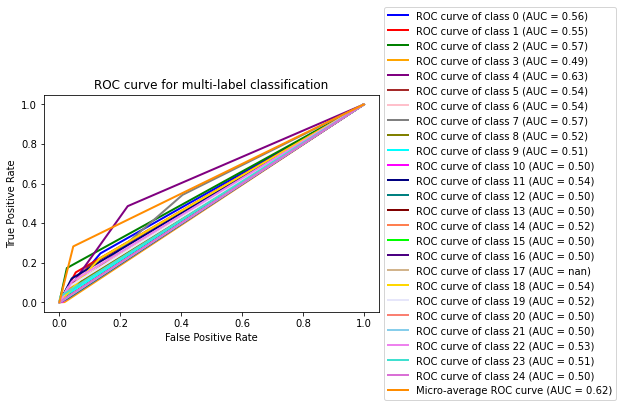

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Assuming y_true and y_pred are numpy arrays of shape (n_samples, n_classes)
n_classes = 25

# Compute the ROC curve and AUC for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_binary.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each label
plt.figure()
lw = 2
colors =  cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
                'magenta', 'navy', 'teal', 'maroon', 'coral', 'lime', 'indigo', 'tan', 'gold', 'lavender',
                'salmon', 'skyblue', 'violet', 'turquoise', 'orchid']) # Add more colors if necessary
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'
                                                       ''.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=lw,
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]))

# Add axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-label classification')
# plt.legend(loc="lower right")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [57]:
df[1:].sum()

Id             tt0085549tt0086465tt0086567tt0086034tt0086383t...
Action                                                      1343
Adventure                                                    870
Animation                                                    244
Biography                                                    441
Comedy                                                      2899
Crime                                                       1176
Documentary                                                  652
Drama                                                       3618
Family                                                       434
Fantasy                                                      467
History                                                      224
Horror                                                       503
Music                                                        305
Musical                                                       97
Mystery                  

In [14]:
import gradio as gr
import numpy as np
import urllib.request
from PIL import Image
import tensorflow as tf
import pandas as pd

# Load the pre-trained model
model = tf.keras.models.load_model("my_model.h5")

# Load the label mapping file


# Define the prediction function
def predict(image_file):
    # Download the image from the URL
        
    img = Image.open(image_file)
    
    # Preprocess the image
    
    # Preprocess the image
    img = img.resize((224, 224))
    img_arr = np.array(img) / 255.0  # normalize the pixel values
    img_arr = np.expand_dims(img_arr, axis=0)
    
    # Make the prediction
    predictions = model.predict(img_arr)
    
    # Apply thresholding to get the predicted labels
    threshold = 0.5
    predicted_labels = []
    for i, p in enumerate(predictions[0]):
        if p >= threshold:
            predicted_labels.append(i)
    
    # Map the predicted labels to their names
    predicted_labels_names = []
    for i in predicted_labels:
        predicted_labels_names.append(df.drop('Id', axis=1).columns[i])
    
    # Return the predicted labels as a comma-separated string
    return ", ".join(predicted_labels_names)

# Create the Gradio interface
input_image_url = gr.inputs.Textbox(label="Enter an image URL:")
output_label = gr.outputs.Label()
interface = gr.Interface(fn=predict, inputs=input_image_url, outputs=output_label, capture_session=True)


C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
C:\Users\LENOVO\anaconda3\lib\site-pa

In [15]:
interface.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\routes.py", line 399, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1299, in process_api
    result = await self.call_function(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1022, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-14-732430f3e5b8>", line 18, in predict
    img = Image.open(image_file)
  File

1/1 [==============================] - 0s 100ms/step


Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\routes.py", line 399, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1299, in process_api
    result = await self.call_function(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1022, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-6-732430f3e5b8>", line 18, in predict
    img = Image.open(image_file)
  File 

1/1 [==============================] - 0s 108ms/step


Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\routes.py", line 399, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1299, in process_api
    result = await self.call_function(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1022, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-6-732430f3e5b8>", line 18, in predict
    img = Image.open(image_file)
  File 

Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\routes.py", line 399, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1299, in process_api
    result = await self.call_function(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\gradio\blocks.py", line 1022, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-6-732430f3e5b8>", line 18, in predict
    img = Image.open(image_file)
  File 

1/1 [==============================] - 0s 52ms/step


In [17]:
interface.close()

Closing server running on port: 7864
